___

<center><h1>Bank Churn Analysis</h1></center>

___

<center><h2>I Cloud 7</h2></center><br>
<center> Data Scientist Jr. Assessment </center>

___
<p></p>
<center style="color: #AA6373; font-weight: 400;"><strong>Presented by:</strong></center>
<center style="color: #AA6373; font-weight: 400;">Jorge Forero L.</center>

<center>September 2024</center>
<p></p>

In [1]:
# Common Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Modelling
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Testing and Evaluation
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
import unittest

In [2]:
file_path = '../src/Bank+Customer+Churn/Bank_Churn.csv'

# Load the CSV file into a DataFrame, handling potential errors
try:
    # Load the CSV with specified encoding and handle any bad lines
    df_bank_churn = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip')
    print("Data loaded successfully. Displaying the first 5 rows:")
    print(df_bank_churn.head())

    # Print the column names
    print("\nColumn names:")
    print(df_bank_churn.columns)

except FileNotFoundError:
    print("Error: File not found at the specified path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Data loaded successfully. Displaying the first 5 rows:
   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4      

## Exploratory Data Analysis

#### Volume of Data

In [3]:
# Count the number of records (rows) and features (columns)
num_records = len(df_bank_churn)
num_features = len(df_bank_churn.columns)

# Print the size of the dataset
print(f"The dataset has {num_records} records and {num_features} features.")

The dataset has 10000 records and 13 features.


In [4]:
# Basic data exploration
print("Shape of the dataset:", df_bank_churn.shape)
print("Data types:", df_bank_churn.dtypes)
print("Missing values in each column:", df_bank_churn.isnull().sum())
df_bank_churn.describe()

Shape of the dataset: (10000, 13)
Data types: CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
Missing values in each column: CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Data Cleaning

##### Fixing Data Types

In [5]:
# Change the data types of the specified columns to Boolean because of the description of each
df_bank_churn['HasCrCard'] = df_bank_churn['HasCrCard'].astype(bool)
df_bank_churn['IsActiveMember'] = df_bank_churn['IsActiveMember'].astype(bool)

print(df_bank_churn[['HasCrCard', 'IsActiveMember']].dtypes)

HasCrCard         bool
IsActiveMember    bool
dtype: object


In [6]:
# List of columns to drop
columns_to_drop = ['Surname', 'Gender', 'CustomerId']

df_cleaned = df_bank_churn.drop(columns=columns_to_drop)

df_cleaned.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,True,True,101348.88,1
1,608,Spain,41,1,83807.86,1,False,True,112542.58,0
2,502,France,42,8,159660.80,3,True,False,113931.57,1
3,699,France,39,1,0.00,2,False,False,93826.63,0
4,850,Spain,43,2,125510.82,1,True,True,79084.10,0


#### Categorical Feature Summary

Here we assess the distribution of values across categorical features 

In [7]:
# Set the count to distinct values in each categorical feature
for col_name in ['Geography', 'NumOfProducts']:
    print(f"\nDistinct counts for {col_name}:")
    print(df_cleaned[col_name].value_counts())



Distinct counts for Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Distinct counts for NumOfProducts:
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


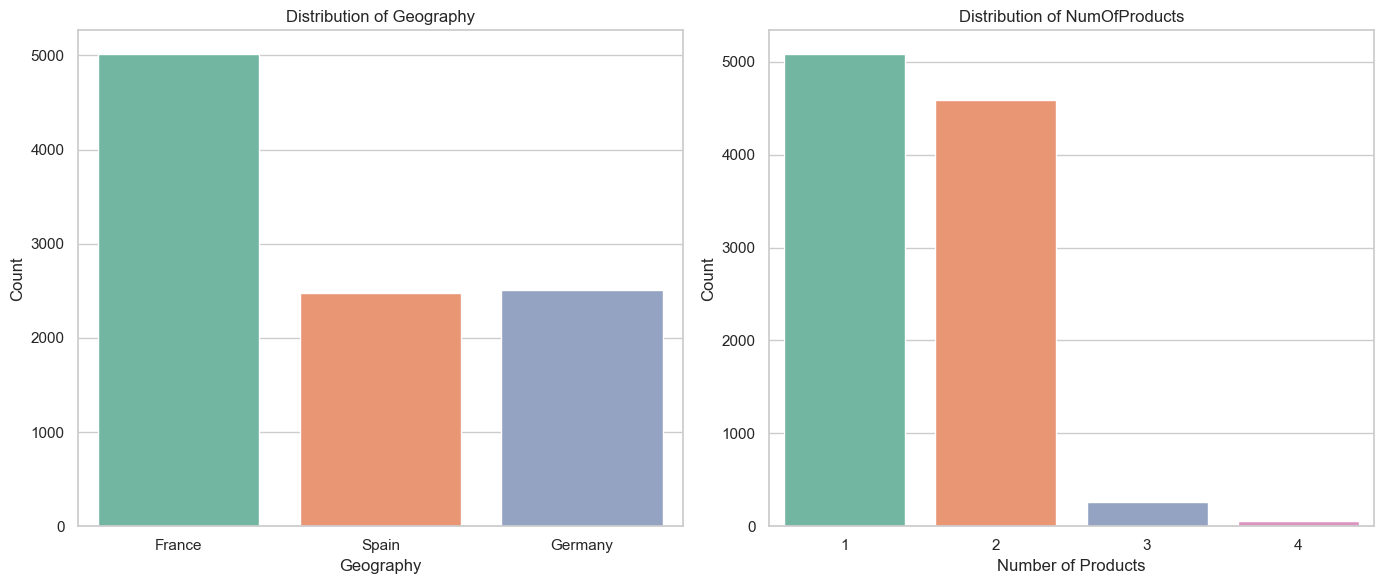

In [8]:
sns.set(style="whitegrid")

# Create two subplots - one for 'Geography' and one for 'NumOfProducts'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of 'Geography'
sns.countplot(ax=axes[0], data=df_bank_churn, x='Geography', hue='Geography', palette='Set2', legend=False)
axes[0].set_title('Distribution of Geography')
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Count')

# Plot the distribution of 'NumOfProducts'
sns.countplot(ax=axes[1], data=df_bank_churn, x='NumOfProducts', hue='NumOfProducts', palette='Set2', legend=False)
axes[1].set_title('Distribution of NumOfProducts')
axes[1].set_xlabel('Number of Products')
axes[1].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

#### Class Imbalance Analysis

Here we determine the distribution of the target feature "Exited" where we want to assess class imbalance that is a critical factor to implement Machine Learning Models

In [9]:
# Count the number of occurrences for each class in 'Late_delivery_risk'
exited_counts = df_cleaned['Exited'].value_counts()

# Display the counts
print("Count of occurrences for each class in 'Exited':")
print(exited_counts)

Count of occurrences for each class in 'Exited':
Exited
0    7963
1    2037
Name: count, dtype: int64


#### Region Specific Churn Analysis

If we train one global model it might not capture the unique patterns in each country. Training separate models for France, Spain and Germany would likely improve the accuracy of the predictions and allow us to identify features that are most important in each region.

In [10]:
# Split the dataset by country
df_france = df_cleaned[df_bank_churn['Geography'] == 'France']
df_spain = df_cleaned[df_bank_churn['Geography'] == 'Spain']
df_germany = df_cleaned[df_bank_churn['Geography'] == 'Germany']

# Verify the split
print("France dataset size:", df_france.shape)
print("Spain dataset size:", df_spain.shape)
print("Germany dataset size:", df_germany.shape)

France dataset size: (5014, 10)
Spain dataset size: (2477, 10)
Germany dataset size: (2509, 10)


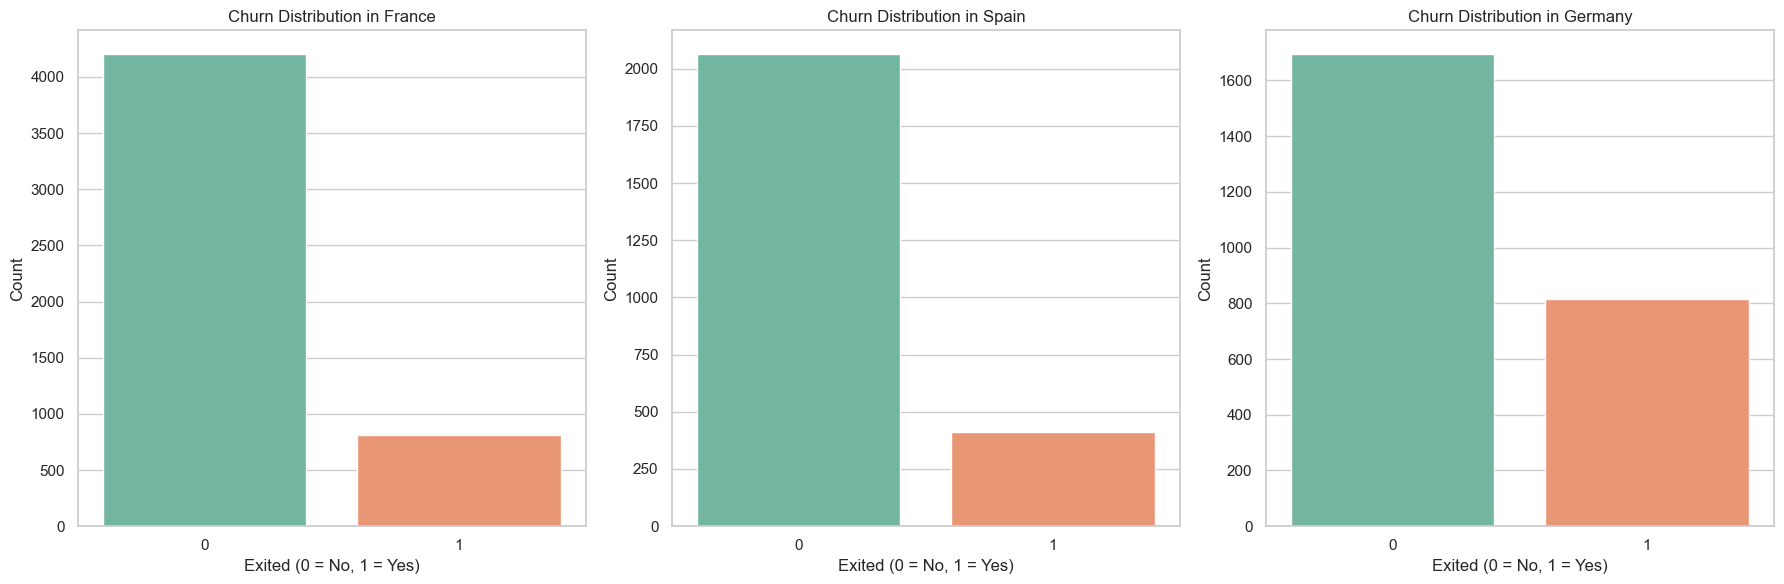

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure with 3 subplots (one for each country)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# France
sns.countplot(ax=axes[0], data=df_france, x='Exited', hue='Exited', palette='Set2', legend=False)
axes[0].set_title('Churn Distribution in France')
axes[0].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[0].set_ylabel('Count')

# Spain
sns.countplot(ax=axes[1], data=df_spain, x='Exited', hue='Exited', palette='Set2', legend=False)
axes[1].set_title('Churn Distribution in Spain')
axes[1].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[1].set_ylabel('Count')

# Germany
sns.countplot(ax=axes[2], data=df_germany, x='Exited', hue='Exited', palette='Set2', legend=False)
axes[2].set_title('Churn Distribution in Germany')
axes[2].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

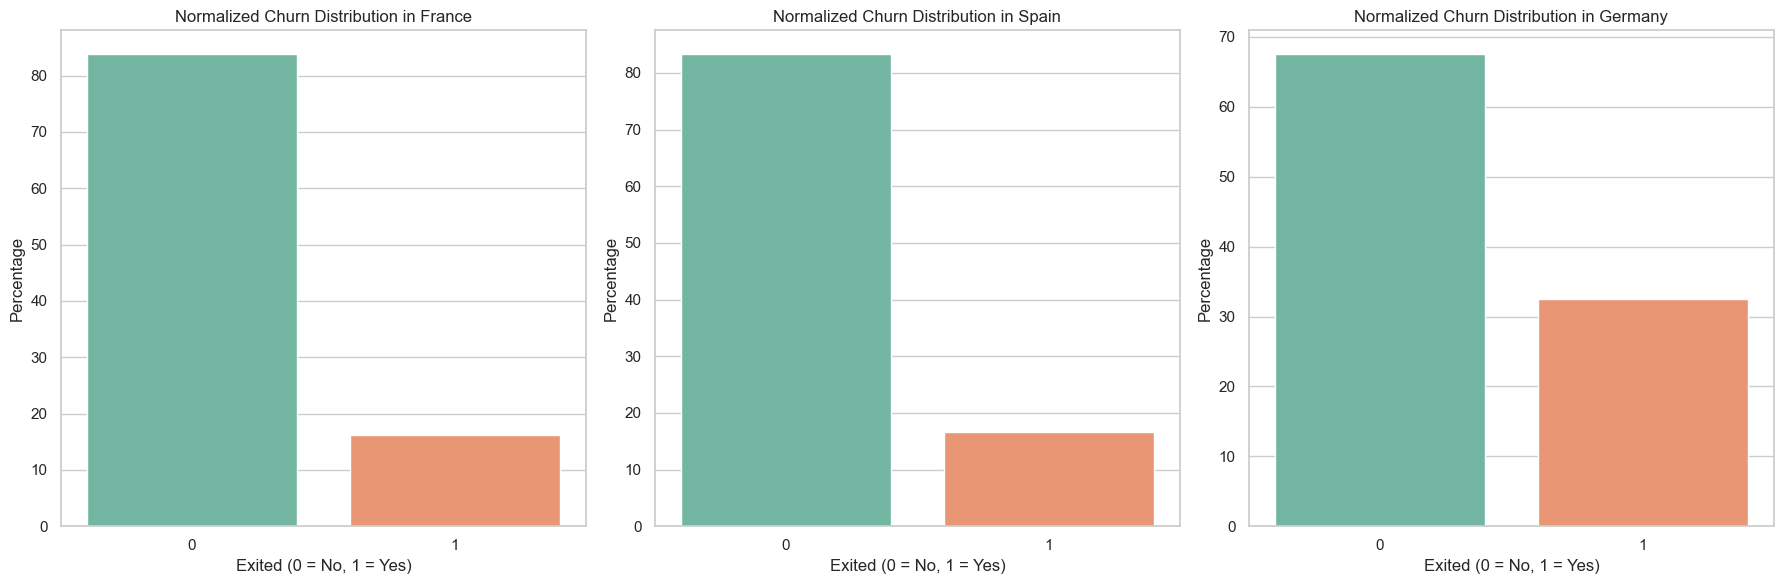

In [12]:
# Function to normalize churn
def normalize_churn(df):
    churn_counts = df['Exited'].value_counts(normalize=True) * 100
    return churn_counts

# Normalize churn for each country
churn_france = normalize_churn(df_france)
churn_spain = normalize_churn(df_spain)
churn_germany = normalize_churn(df_germany)

# Plot the normalized churn distribution for each country
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for France
sns.barplot(x=churn_france.index, y=churn_france.values, ax=axes[0], hue=churn_france.index, palette='Set2', legend=False)
axes[0].set_title('Normalized Churn Distribution in France')
axes[0].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[0].set_ylabel('Percentage')

# Plot for Spain
sns.barplot(x=churn_spain.index, y=churn_spain.values, ax=axes[1], hue=churn_spain.index, palette='Set2', legend=False)
axes[1].set_title('Normalized Churn Distribution in Spain')
axes[1].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[1].set_ylabel('Percentage')

# Plot for Germany
sns.barplot(x=churn_germany.index, y=churn_germany.values, ax=axes[2], hue=churn_germany.index, palette='Set2', legend=False)
axes[2].set_title('Normalized Churn Distribution in Germany')
axes[2].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[2].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout()
plt.show()

#### Feature Selection
The dataset is conformed by 10 features after dropping the ones that could affect the analysis or that are not most relevant

In [13]:
print(df_cleaned.columns)

Index(['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [14]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Define target (Exited)
target = 'Exited'

# Select features and target for France
X_france = df_france[features]
y_france = df_france[target]

# Select features and target for Spain
X_spain = df_spain[features]
y_spain = df_spain[target]

# Select features and target for Germany
X_germany = df_germany[features]
y_germany = df_germany[target]

# Verify the shape of the selected data
print("France selected data shape:", X_france.shape)
print("Spain selected data shape:", X_spain.shape)
print("Germany selected data shape:", X_germany.shape)

France selected data shape: (5014, 8)
Spain selected data shape: (2477, 8)
Germany selected data shape: (2509, 8)


#### One Hot Encoding

In [15]:
# One-hot encode the 'NumOfProducts' column
X_france = pd.get_dummies(df_france[features], columns=['NumOfProducts'], drop_first=True)
X_spain = pd.get_dummies(df_spain[features], columns=['NumOfProducts'], drop_first=True)
X_germany = pd.get_dummies(df_germany[features], columns=['NumOfProducts'], drop_first=True)

# The target remains the same
y_france = df_france[target]
y_spain = df_spain[target]
y_germany = df_germany[target]

# Verify the shape of the selected data after one-hot encoding
print("France selected data shape after encoding:", X_france.shape)
print("Spain selected data shape after encoding:", X_spain.shape)
print("Germany selected data shape after encoding:", X_germany.shape)

France selected data shape after encoding: (5014, 10)
Spain selected data shape after encoding: (2477, 10)
Germany selected data shape after encoding: (2509, 10)


### Modelling
Here we select the Random Forest, SVM, and Logistic Regression to make the analysis

### Undersampled Dataset

In [16]:
# Function to perform undersampling
def undersample_data(X, y):
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    return X_resampled, y_resampled
 
# France dataset
X_france_resampled, y_france_resampled = undersample_data(X_france, y_france)
print("France data shape after undersampling:", X_france_resampled.shape)
print("France target shape after undersampling:", y_france_resampled.shape)

# Spain dataset
X_spain_resampled, y_spain_resampled = undersample_data(X_spain, y_spain)
print("Spain data shape after undersampling:", X_spain_resampled.shape)
print("Spain target shape after undersampling:", y_spain_resampled.shape)

# Germany dataset
X_germany_resampled, y_germany_resampled = undersample_data(X_germany, y_germany)
print("Germany data shape after undersampling:", X_germany_resampled.shape)
print("Germany target shape after undersampling:", y_germany_resampled.shape)

France data shape after undersampling: (1620, 10)
France target shape after undersampling: (1620,)
Spain data shape after undersampling: (826, 10)
Spain target shape after undersampling: (826,)
Germany data shape after undersampling: (1628, 10)
Germany target shape after undersampling: (1628,)


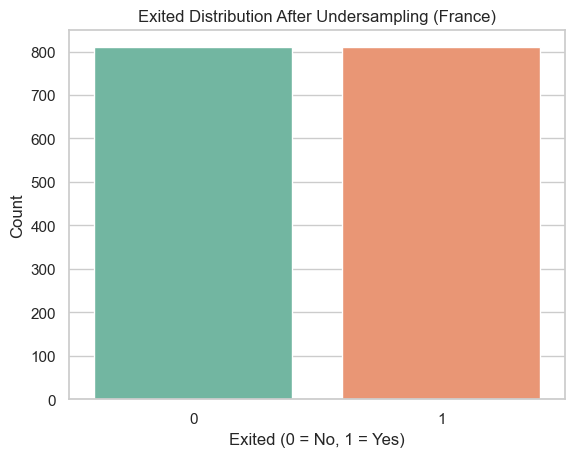

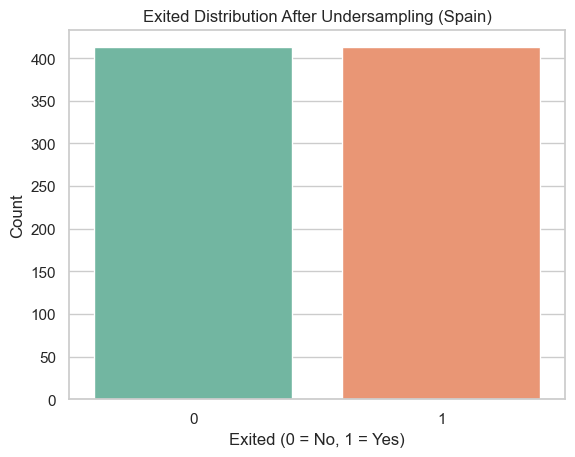

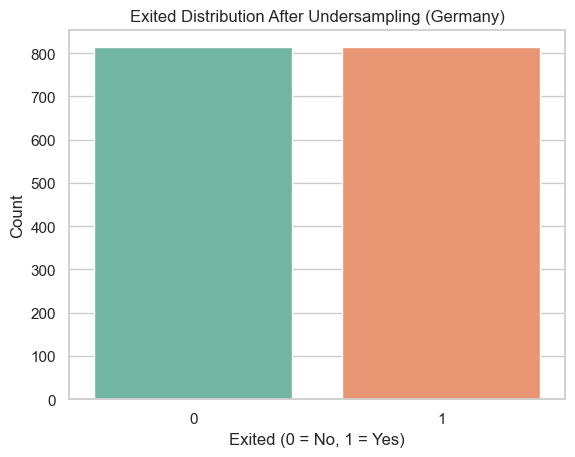

In [17]:
# Function to plot the distribution of the 'Exited' feature
def plot_exited_distribution(y_resampled, title):
    sns.countplot(x=y_resampled, palette='Set2', hue=y_resampled, legend=False)
    plt.title(title)
    plt.xlabel('Exited (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.show()

# Plot for France after undersampling
plot_exited_distribution(y_france_resampled, "Exited Distribution After Undersampling (France)")

# Plot for Spain after undersampling
plot_exited_distribution(y_spain_resampled, "Exited Distribution After Undersampling (Spain)")

# Plot for Germany after undersampling
plot_exited_distribution(y_germany_resampled, "Exited Distribution After Undersampling (Germany)")

#### Logistic Regression

In [18]:
%%time
# Function to train Logistic Regression and evaluate performance
def train_logistic_regression(X, y, country_name):
    # Split the resampled data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Logistic Regression model
    lr_model = LogisticRegression(random_state=42)

    # Train the model
    lr_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lr_model.predict(X_test)

    # Print classification report
    print(f"Logistic Regression Results for {country_name}:")
    print(classification_report(y_test, y_pred))

# Train and evaluate Logistic Regression for France
train_logistic_regression(X_france_resampled, y_france_resampled, "France")

# Train and evaluate Logistic Regression for Spain
train_logistic_regression(X_spain_resampled, y_spain_resampled, "Spain")

# Train and evaluate Logistic Regression for Germany
train_logistic_regression(X_germany_resampled, y_germany_resampled, "Germany")

Logistic Regression Results for France:
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       254
           1       0.65      0.61      0.63       232

    accuracy                           0.65       486
   macro avg       0.65      0.65      0.65       486
weighted avg       0.65      0.65      0.65       486

Logistic Regression Results for Spain:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       131
           1       0.65      0.72      0.68       117

    accuracy                           0.69       248
   macro avg       0.69      0.69      0.69       248
weighted avg       0.69      0.69      0.69       248

Logistic Regression Results for Germany:
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       250
           1       0.66      0.69      0.68       239

    accuracy                           0.68       489
   macro

#### Random Forest

In [19]:
%%time
# Function to train Random Forest and evaluate performance
def train_random_forest(X, y, country_name):
    # Split the resampled data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Print classification report
    print(f"Random Forest Results for {country_name}:")
    print(classification_report(y_test, y_pred))

# Train and evaluate Random Forest for France
train_random_forest(X_france_resampled, y_france_resampled, "France")

# Train and evaluate Random Forest for Spain
train_random_forest(X_spain_resampled, y_spain_resampled, "Spain")

# Train and evaluate Random Forest for Germany
train_random_forest(X_germany_resampled, y_germany_resampled, "Germany")

Random Forest Results for France:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       254
           1       0.76      0.73      0.75       232

    accuracy                           0.76       486
   macro avg       0.76      0.76      0.76       486
weighted avg       0.76      0.76      0.76       486

Random Forest Results for Spain:
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       131
           1       0.75      0.68      0.71       117

    accuracy                           0.74       248
   macro avg       0.74      0.74      0.74       248
weighted avg       0.74      0.74      0.74       248

Random Forest Results for Germany:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       250
           1       0.77      0.72      0.75       239

    accuracy                           0.76       489
   macro avg       0.76   

#### SVM

In [20]:
%%time
# Function to train SVM and evaluate performance
def train_svm(X, y, country_name):
    # Split the resampled data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the SVM model
    svm_model = SVC(random_state=42)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Print classification report
    print(f"SVM Results for {country_name}:")
    print(classification_report(y_test, y_pred))

# Train and evaluate SVM for France
train_svm(X_france_resampled, y_france_resampled, "France")

# Train and evaluate SVM for Spain
train_svm(X_spain_resampled, y_spain_resampled, "Spain")

# Train and evaluate SVM for Germany
train_svm(X_germany_resampled, y_germany_resampled, "Germany")

SVM Results for France:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53       254
           1       0.51      0.58      0.54       232

    accuracy                           0.53       486
   macro avg       0.54      0.54      0.53       486
weighted avg       0.54      0.53      0.53       486

SVM Results for Spain:
              precision    recall  f1-score   support

           0       0.58      0.49      0.53       131
           1       0.51      0.60      0.55       117

    accuracy                           0.54       248
   macro avg       0.54      0.54      0.54       248
weighted avg       0.55      0.54      0.54       248

SVM Results for Germany:
              precision    recall  f1-score   support

           0       0.71      0.24      0.35       250
           1       0.53      0.90      0.67       239

    accuracy                           0.56       489
   macro avg       0.62      0.57      0.51       489
we

#### Confusion Matrix

In [21]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Function to train a model and plot confusion matrices
def train_and_plot_confusion_matrices(model, X_train, X_test, y_train, y_test, model_name, country_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on training data
    y_train_pred = model.predict(X_train)
    plot_confusion_matrix(y_train, y_train_pred, f"{model_name} Confusion Matrix (Training) - {country_name}")

    # Predictions on validation (test) data
    y_test_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_test_pred, f"{model_name} Confusion Matrix (Validation) - {country_name}")

# You can repeat this process for Logistic Regression and Random Forest for each country

#### France

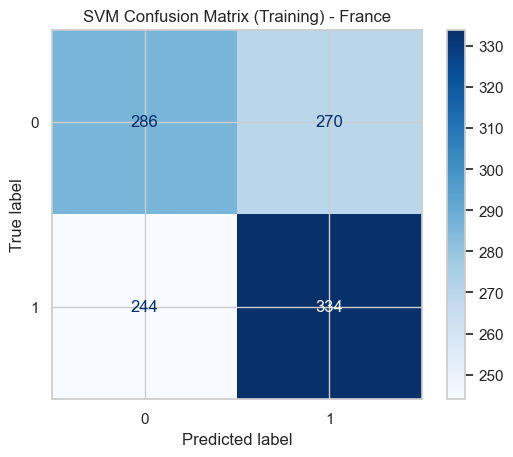

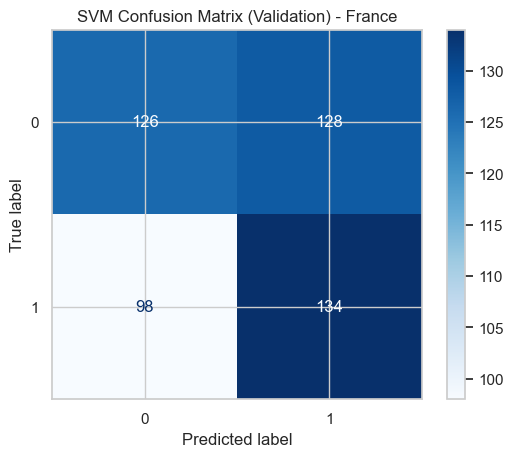

In [22]:
svm_model = SVC(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_france_resampled, y_france_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(svm_model, X_train, X_test, y_train, y_test, "SVM", "France")

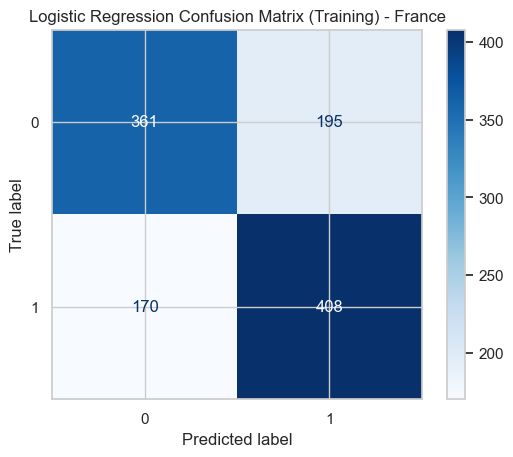

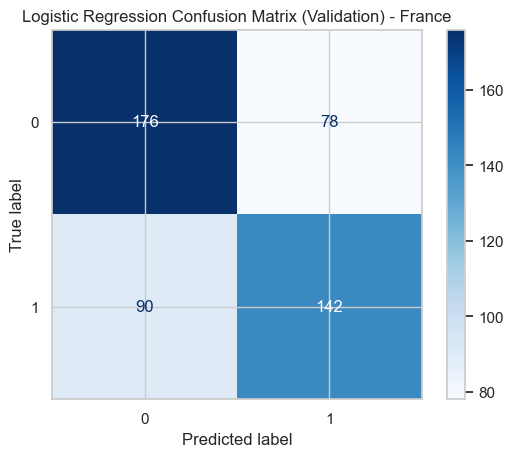

In [23]:
lr_model = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_france_resampled, y_france_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression", "France")

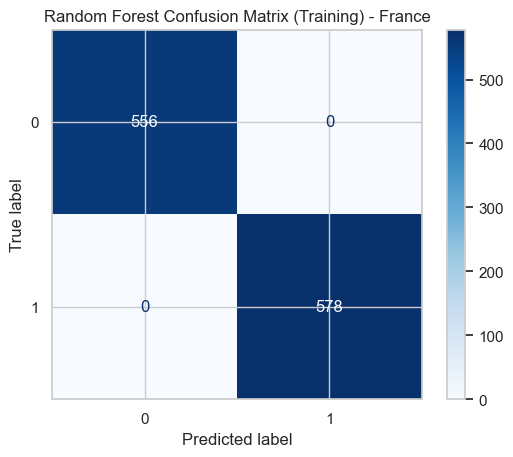

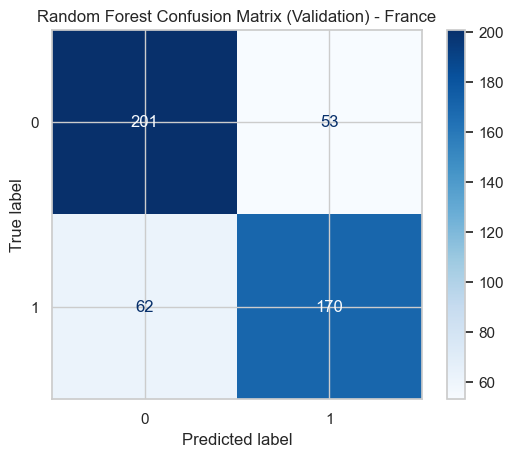

In [24]:
rf_model = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_france_resampled, y_france_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(rf_model, X_train, X_test, y_train, y_test, "Random Forest", "France")

### Spain

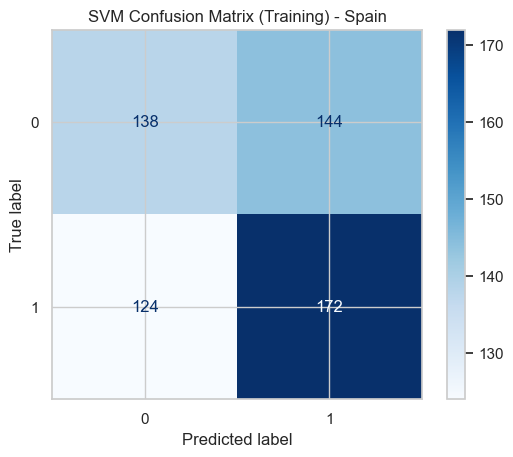

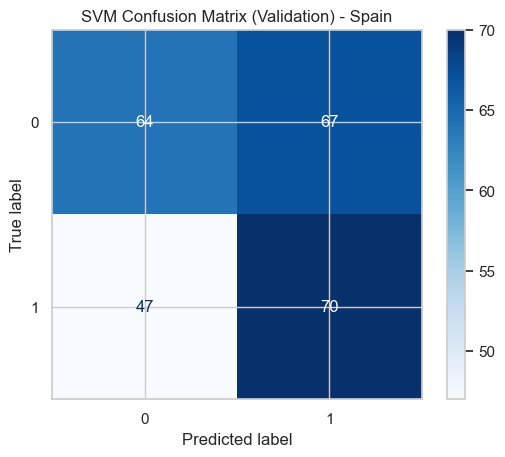

In [25]:
svm_model = SVC(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_spain_resampled, y_spain_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(svm_model, X_train, X_test, y_train, y_test, "SVM", "Spain")

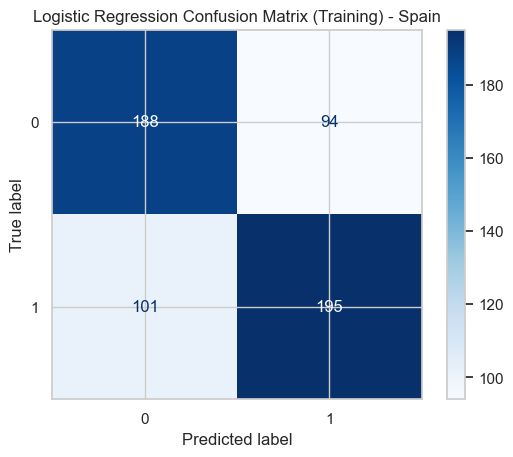

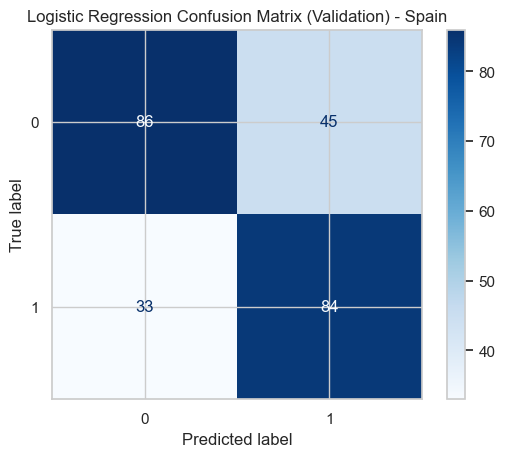

In [26]:
lr_model = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_spain_resampled, y_spain_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression", "Spain")

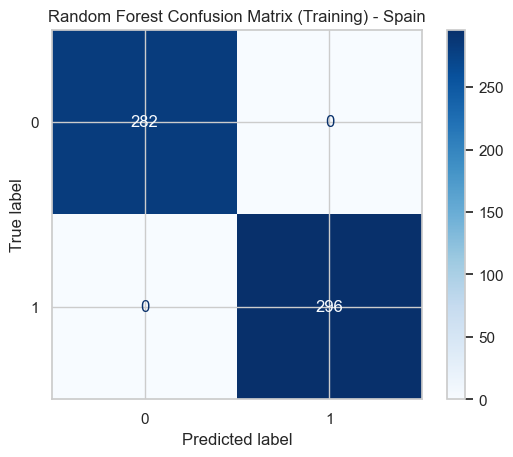

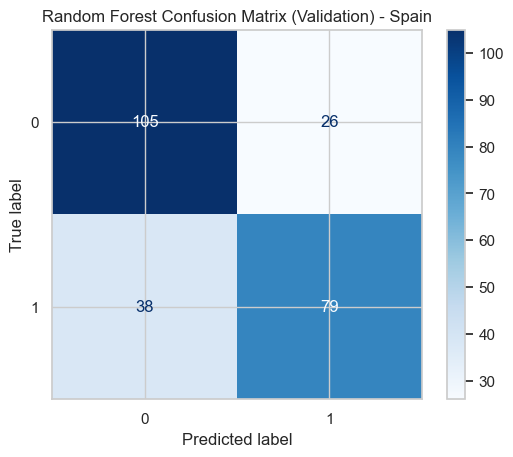

In [27]:
rf_model = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_spain_resampled, y_spain_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(rf_model, X_train, X_test, y_train, y_test, "Random Forest", "Spain")

#### Germany

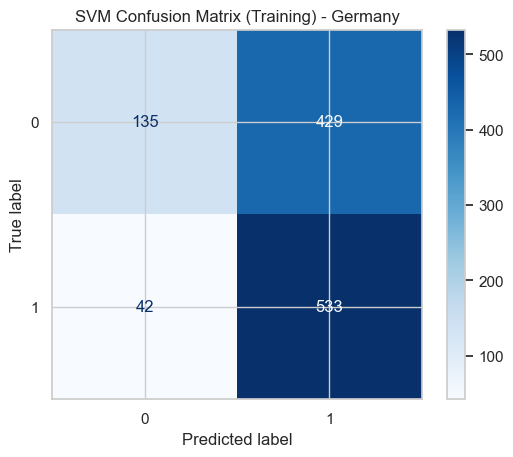

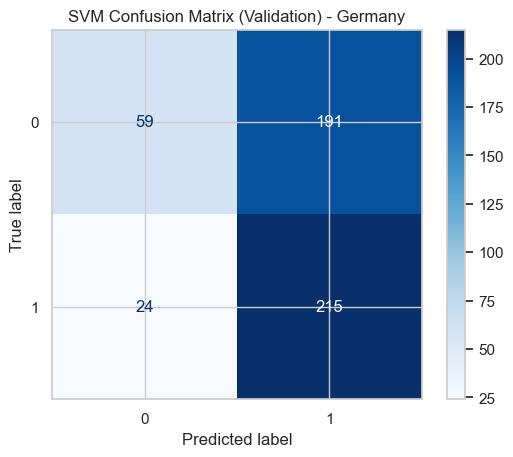

In [28]:
svm_model = SVC(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_germany_resampled, y_germany_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(svm_model, X_train, X_test, y_train, y_test, "SVM", "Germany")

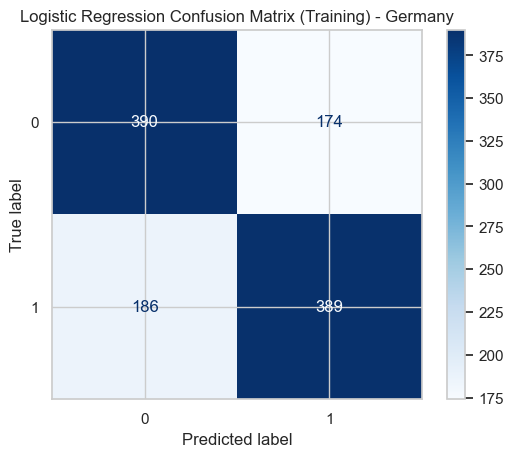

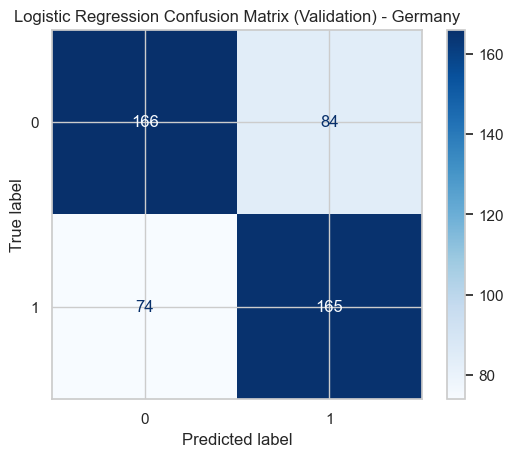

In [29]:
lr_model = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_germany_resampled, y_germany_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression", "Germany")

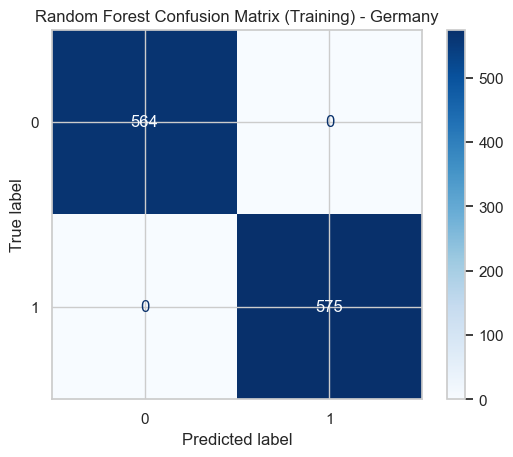

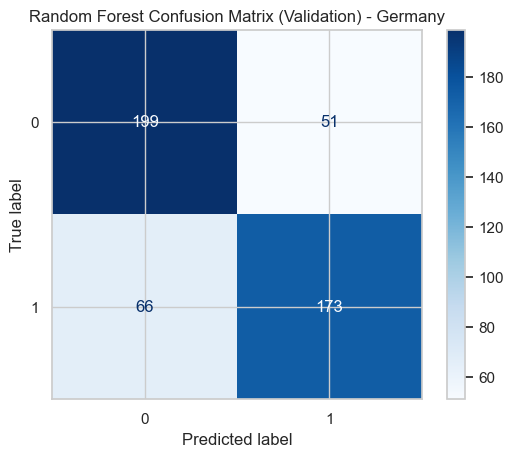

In [30]:
rf_model = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_germany_resampled, y_germany_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(rf_model, X_train, X_test, y_train, y_test, "Random Forest", "Germany")

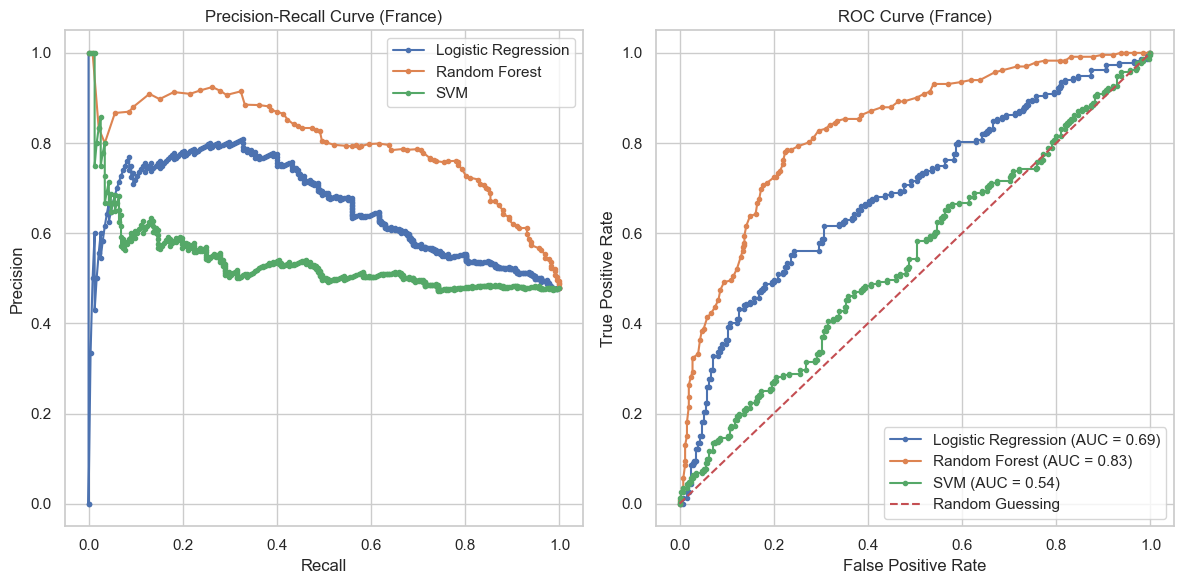

In [33]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot Precision-Recall and ROC curves for multiple models
def plot_all_models_curves(models, model_names, X_train, X_test, y_train, y_test, country_name):
    plt.figure(figsize=(12, 6))

    # Subplot 1: Precision-Recall Curve
    plt.subplot(1, 2, 1)

    for model, model_name in zip(models, model_names):
        # Train the model
        model.fit(X_train, y_train)

        # Get predicted probabilities for Precision-Recall curve
        y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)

        # Plot Precision-Recall curve
        plt.plot(recall, precision, marker='.', label=f"{model_name}")

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"Precision-Recall Curve ({country_name})")
    plt.legend()

    # Subplot 2: ROC Curve
    plt.subplot(1, 2, 2)

    for model, model_name in zip(models, model_names):
        # Train the model
        model.fit(X_train, y_train)

        # Get predicted probabilities for ROC curve
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, marker='.', label=f"{model_name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle='--', label="Random Guessing")  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve ({country_name})")
    plt.legend()

    plt.tight_layout()
    plt.show()

# List of models
models = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(random_state=42, probability=True)  # SVM with probability=True to get probabilities
]
model_names = ["Logistic Regression", "Random Forest", "SVM"]

# Example for France
X_train, X_test, y_train, y_test = train_test_split(X_france_resampled, y_france_resampled, test_size=0.3, random_state=42)

# Plot Precision-Recall and ROC curves for all models for France
plot_all_models_curves(models, model_names, X_train, X_test, y_train, y_test, "France")

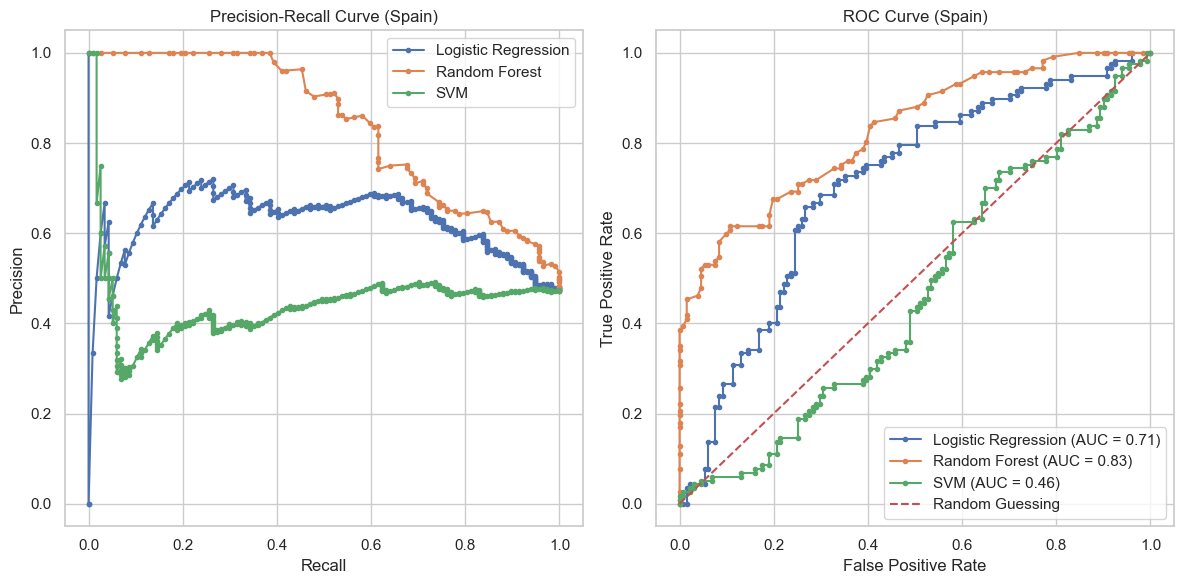

In [34]:
# Function to plot Precision-Recall and ROC curves for multiple models
def plot_all_models_curves(models, model_names, X_train, X_test, y_train, y_test, country_name):
    plt.figure(figsize=(12, 6))

    # Subplot 1: Precision-Recall Curve
    plt.subplot(1, 2, 1)

    for model, model_name in zip(models, model_names):
        # Train the model
        model.fit(X_train, y_train)

        # Get predicted probabilities for Precision-Recall curve
        y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)

        # Plot Precision-Recall curve
        plt.plot(recall, precision, marker='.', label=f"{model_name}")

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"Precision-Recall Curve ({country_name})")
    plt.legend()

    # Subplot 2: ROC Curve
    plt.subplot(1, 2, 2)

    for model, model_name in zip(models, model_names):
        # Train the model
        model.fit(X_train, y_train)

        # Get predicted probabilities for ROC curve
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, marker='.', label=f"{model_name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle='--', label="Random Guessing")  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve ({country_name})")
    plt.legend()

    plt.tight_layout()
    plt.show()

# List of models
models = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(random_state=42, probability=True)  # SVM with probability=True to get probabilities
]
model_names = ["Logistic Regression", "Random Forest", "SVM"]

# Example for France
X_train, X_test, y_train, y_test = train_test_split(X_spain_resampled, y_spain_resampled, test_size=0.3, random_state=42)

# Plot Precision-Recall and ROC curves for all models for France
plot_all_models_curves(models, model_names, X_train, X_test, y_train, y_test, "Spain")

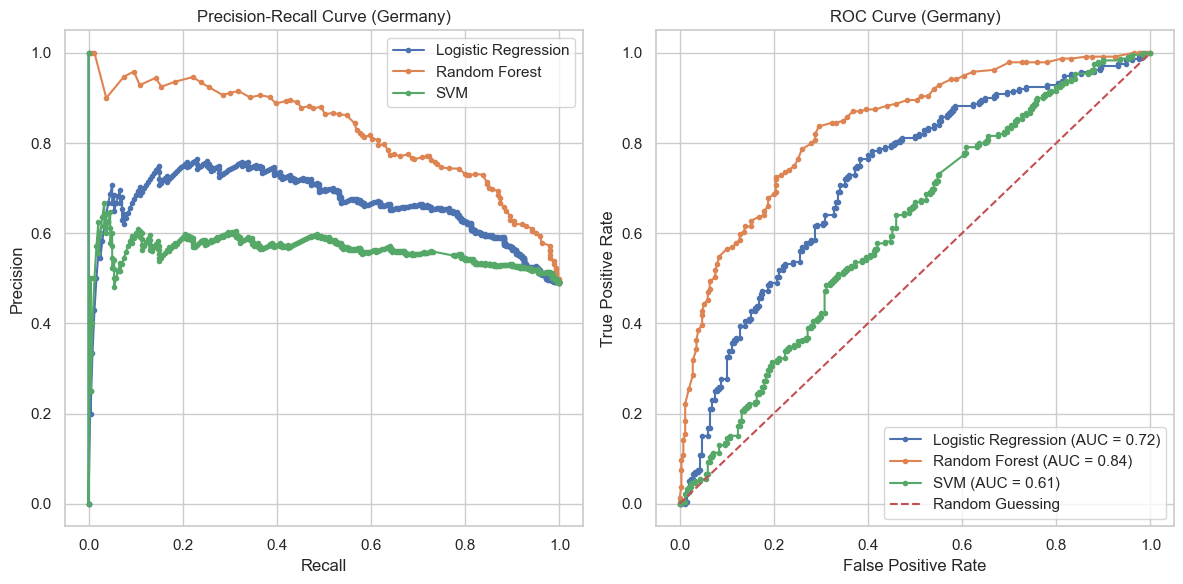

In [35]:
# Function to plot Precision-Recall and ROC curves for multiple models
def plot_all_models_curves(models, model_names, X_train, X_test, y_train, y_test, country_name):
    plt.figure(figsize=(12, 6))

    # Subplot 1: Precision-Recall Curve
    plt.subplot(1, 2, 1)

    for model, model_name in zip(models, model_names):
        # Train the model
        model.fit(X_train, y_train)

        # Get predicted probabilities for Precision-Recall curve
        y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)

        # Plot Precision-Recall curve
        plt.plot(recall, precision, marker='.', label=f"{model_name}")

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"Precision-Recall Curve ({country_name})")
    plt.legend()

    # Subplot 2: ROC Curve
    plt.subplot(1, 2, 2)

    for model, model_name in zip(models, model_names):
        # Train the model
        model.fit(X_train, y_train)

        # Get predicted probabilities for ROC curve
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, marker='.', label=f"{model_name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle='--', label="Random Guessing")  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve ({country_name})")
    plt.legend()

    plt.tight_layout()
    plt.show()

# List of models
models = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(random_state=42, probability=True)  # SVM with probability=True to get probabilities
]
model_names = ["Logistic Regression", "Random Forest", "SVM"]

# Example for France
X_train, X_test, y_train, y_test = train_test_split(X_germany_resampled, y_germany_resampled, test_size=0.3, random_state=42)

# Plot Precision-Recall and ROC curves for all models for France
plot_all_models_curves(models, model_names, X_train, X_test, y_train, y_test, "Germany")

### Oversample Dataset

In [ ]:
# List of columns to drop
columns_to_drop = ['Surname', 'Gender', 'CustomerId']

df_cleaned = df_bank_churn.drop(columns=columns_to_drop)

df_cleaned.head()

#### Categorical Feature Summary

Here we assess the distribution of values across categorical features 

In [ ]:
# Set the count to distinct values in each categorical feature
for col_name in ['Geography', 'NumOfProducts']:
    print(f"\nDistinct counts for {col_name}:")
    print(df_cleaned[col_name].value_counts())


In [ ]:
sns.set(style="whitegrid")

# Create two subplots - one for 'Geography' and one for 'NumOfProducts'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of 'Geography'
sns.countplot(ax=axes[0], data=df_bank_churn, x='Geography', hue='Geography', palette='Set2', legend=False)
axes[0].set_title('Distribution of Geography')
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Count')

# Plot the distribution of 'NumOfProducts'
sns.countplot(ax=axes[1], data=df_bank_churn, x='NumOfProducts', hue='NumOfProducts', palette='Set2', legend=False)
axes[1].set_title('Distribution of NumOfProducts')
axes[1].set_xlabel('Number of Products')
axes[1].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

#### Class Imbalance Analysis

Here we determine the distribution of the target feature "Exited" where we want to assess class imbalance that is a critical factor to implement Machine Learning Models

In [ ]:
# Count the number of occurrences for each class in 'Late_delivery_risk'
exited_counts = df_cleaned['Exited'].value_counts()

# Display the counts
print("Count of occurrences for each class in 'Exited':")
print(exited_counts)

#### Region Specific Churn Analysis

If we train one global model it might not capture the unique patterns in each country. Training separate models for France, Spain and Germany would likely improve the accuracy of the predictions and allow us to identify features that are most important in each region.

In [ ]:
# Split the dataset by country
df_france = df_cleaned[df_bank_churn['Geography'] == 'France']
df_spain = df_cleaned[df_bank_churn['Geography'] == 'Spain']
df_germany = df_cleaned[df_bank_churn['Geography'] == 'Germany']

# Verify the split
print("France dataset size:", df_france.shape)
print("Spain dataset size:", df_spain.shape)
print("Germany dataset size:", df_germany.shape)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure with 3 subplots (one for each country)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# France
sns.countplot(ax=axes[0], data=df_france, x='Exited', hue='Exited', palette='Set2', legend=False)
axes[0].set_title('Churn Distribution in France')
axes[0].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[0].set_ylabel('Count')

# Spain
sns.countplot(ax=axes[1], data=df_spain, x='Exited', hue='Exited', palette='Set2', legend=False)
axes[1].set_title('Churn Distribution in Spain')
axes[1].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[1].set_ylabel('Count')

# Germany
sns.countplot(ax=axes[2], data=df_germany, x='Exited', hue='Exited', palette='Set2', legend=False)
axes[2].set_title('Churn Distribution in Germany')
axes[2].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# Function to normalize churn
def normalize_churn(df):
    churn_counts = df['Exited'].value_counts(normalize=True) * 100
    return churn_counts

# Normalize churn for each country
churn_france = normalize_churn(df_france)
churn_spain = normalize_churn(df_spain)
churn_germany = normalize_churn(df_germany)

# Plot the normalized churn distribution for each country
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for France
sns.barplot(x=churn_france.index, y=churn_france.values, ax=axes[0], hue=churn_france.index, palette='Set2', legend=False)
axes[0].set_title('Normalized Churn Distribution in France')
axes[0].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[0].set_ylabel('Percentage')

# Plot for Spain
sns.barplot(x=churn_spain.index, y=churn_spain.values, ax=axes[1], hue=churn_spain.index, palette='Set2', legend=False)
axes[1].set_title('Normalized Churn Distribution in Spain')
axes[1].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[1].set_ylabel('Percentage')

# Plot for Germany
sns.barplot(x=churn_germany.index, y=churn_germany.values, ax=axes[2], hue=churn_germany.index, palette='Set2', legend=False)
axes[2].set_title('Normalized Churn Distribution in Germany')
axes[2].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[2].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout()
plt.show()

#### Feature Selection
The dataset is conformed by 10 features after dropping the ones that could affect the analysis or that are not most relevant

In [ ]:
print(df_cleaned.columns)

In [ ]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Define target (Exited)
target = 'Exited'

# Select features and target for France
X_france = df_france[features]
y_france = df_france[target]

# Select features and target for Spain
X_spain = df_spain[features]
y_spain = df_spain[target]

# Select features and target for Germany
X_germany = df_germany[features]
y_germany = df_germany[target]

# Verify the shape of the selected data
print("France selected data shape:", X_france.shape)
print("Spain selected data shape:", X_spain.shape)
print("Germany selected data shape:", X_germany.shape)

#### One Hot Encoding

In [ ]:
# One-hot encode the 'NumOfProducts' column
X_france = pd.get_dummies(df_france[features], columns=['NumOfProducts'], drop_first=True)
X_spain = pd.get_dummies(df_spain[features], columns=['NumOfProducts'], drop_first=True)
X_germany = pd.get_dummies(df_germany[features], columns=['NumOfProducts'], drop_first=True)

# The target remains the same
y_france = df_france[target]
y_spain = df_spain[target]
y_germany = df_germany[target]

# Verify the shape of the selected data after one-hot encoding
print("France selected data shape after encoding:", X_france.shape)
print("Spain selected data shape after encoding:", X_spain.shape)
print("Germany selected data shape after encoding:", X_germany.shape)

### Modelling
Here we select the Random Forest, SVM, and Logistic Regression to make the analysis

### Undersampled Dataset

In [ ]:
# Function to perform undersampling
def undersample_data(X, y):
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    return X_resampled, y_resampled
 
# France dataset
X_france_resampled, y_france_resampled = undersample_data(X_france, y_france)
print("France data shape after undersampling:", X_france_resampled.shape)
print("France target shape after undersampling:", y_france_resampled.shape)

# Spain dataset
X_spain_resampled, y_spain_resampled = undersample_data(X_spain, y_spain)
print("Spain data shape after undersampling:", X_spain_resampled.shape)
print("Spain target shape after undersampling:", y_spain_resampled.shape)

# Germany dataset
X_germany_resampled, y_germany_resampled = undersample_data(X_germany, y_germany)
print("Germany data shape after undersampling:", X_germany_resampled.shape)
print("Germany target shape after undersampling:", y_germany_resampled.shape)

In [ ]:
# Function to plot the distribution of the 'Exited' feature
def plot_exited_distribution(y_resampled, title):
    sns.countplot(x=y_resampled, palette='Set2', hue=y_resampled, legend=False)
    plt.title(title)
    plt.xlabel('Exited (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.show()

# Plot for France after undersampling
plot_exited_distribution(y_france_resampled, "Exited Distribution After Undersampling (France)")

# Plot for Spain after undersampling
plot_exited_distribution(y_spain_resampled, "Exited Distribution After Undersampling (Spain)")

# Plot for Germany after undersampling
plot_exited_distribution(y_germany_resampled, "Exited Distribution After Undersampling (Germany)")

#### Logistic Regression

In [ ]:
%%time
# Function to train Logistic Regression and evaluate performance
def train_logistic_regression(X, y, country_name):
    # Split the resampled data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Logistic Regression model
    lr_model = LogisticRegression(random_state=42)

    # Train the model
    lr_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lr_model.predict(X_test)

    # Print classification report
    print(f"Logistic Regression Results for {country_name}:")
    print(classification_report(y_test, y_pred))

# Train and evaluate Logistic Regression for France
train_logistic_regression(X_france_resampled, y_france_resampled, "France")

# Train and evaluate Logistic Regression for Spain
train_logistic_regression(X_spain_resampled, y_spain_resampled, "Spain")

# Train and evaluate Logistic Regression for Germany
train_logistic_regression(X_germany_resampled, y_germany_resampled, "Germany")

#### Random Forest

In [ ]:
%%time
# Function to train Random Forest and evaluate performance
def train_random_forest(X, y, country_name):
    # Split the resampled data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Print classification report
    print(f"Random Forest Results for {country_name}:")
    print(classification_report(y_test, y_pred))

# Train and evaluate Random Forest for France
train_random_forest(X_france_resampled, y_france_resampled, "France")

# Train and evaluate Random Forest for Spain
train_random_forest(X_spain_resampled, y_spain_resampled, "Spain")

# Train and evaluate Random Forest for Germany
train_random_forest(X_germany_resampled, y_germany_resampled, "Germany")

#### SVM

In [ ]:
%%time
# Function to train SVM and evaluate performance
def train_svm(X, y, country_name):
    # Split the resampled data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the SVM model
    svm_model = SVC(random_state=42)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Print classification report
    print(f"SVM Results for {country_name}:")
    print(classification_report(y_test, y_pred))

# Train and evaluate SVM for France
train_svm(X_france_resampled, y_france_resampled, "France")

# Train and evaluate SVM for Spain
train_svm(X_spain_resampled, y_spain_resampled, "Spain")

# Train and evaluate SVM for Germany
train_svm(X_germany_resampled, y_germany_resampled, "Germany")

#### Confusion Matrix

In [ ]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Function to train a model and plot confusion matrices
def train_and_plot_confusion_matrices(model, X_train, X_test, y_train, y_test, model_name, country_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on training data
    y_train_pred = model.predict(X_train)
    plot_confusion_matrix(y_train, y_train_pred, f"{model_name} Confusion Matrix (Training) - {country_name}")

    # Predictions on validation (test) data
    y_test_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_test_pred, f"{model_name} Confusion Matrix (Validation) - {country_name}")

# You can repeat this process for Logistic Regression and Random Forest for each country

#### France

In [ ]:
svm_model = SVC(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_france_resampled, y_france_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(svm_model, X_train, X_test, y_train, y_test, "SVM", "France")

In [ ]:
lr_model = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_france_resampled, y_france_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression", "France")

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_france_resampled, y_france_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(rf_model, X_train, X_test, y_train, y_test, "Random Forest", "France")

### Spain

In [ ]:
svm_model = SVC(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_spain_resampled, y_spain_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(svm_model, X_train, X_test, y_train, y_test, "SVM", "Spain")

In [ ]:
# Common Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_precision_recall_curve, plot_roc_curve

# Modelling
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Testing and Evaluation
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
import unittest

In [ ]:
file_path = '../src/Bank+Customer+Churn/Bank_Churn.csv'

# Load the CSV file into a DataFrame, handling potential errors
try:
    # Load the CSV with specified encoding and handle any bad lines
    df_bank_churn = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip')
    print("Data loaded successfully. Displaying the first 5 rows:")
    print(df_bank_churn.head())

    # Print the column names
    print("\nColumn names:")
    print(df_bank_churn.columns)

except FileNotFoundError:
    print("Error: File not found at the specified path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

## Exploratory Data Analysis

#### Volume of Data

In [ ]:
# Count the number of records (rows) and features (columns)
num_records = len(df_bank_churn)
num_features = len(df_bank_churn.columns)

# Print the size of the dataset
print(f"The dataset has {num_records} records and {num_features} features.")

In [ ]:
# Basic data exploration
print("Shape of the dataset:", df_bank_churn.shape)
print("Data types:", df_bank_churn.dtypes)
print("Missing values in each column:", df_bank_churn.isnull().sum())
df_bank_churn.describe()

#### Data Cleaning

##### Fixing Data Types

In [ ]:
# Change the data types of the specified columns to Boolean because of the description of each
df_bank_churn['HasCrCard'] = df_bank_churn['HasCrCard'].astype(bool)
df_bank_churn['IsActiveMember'] = df_bank_churn['IsActiveMember'].astype(bool)

print(df_bank_churn[['HasCrCard', 'IsActiveMember']].dtypes)

In [ ]:
# List of columns to drop
columns_to_drop = ['Surname', 'Gender', 'CustomerId']

df_cleaned = df_bank_churn.drop(columns=columns_to_drop)

df_cleaned.head()

#### Categorical Feature Summary

Here we assess the distribution of values across categorical features 

In [ ]:
# Set the count to distinct values in each categorical feature
for col_name in ['Geography', 'NumOfProducts']:
    print(f"\nDistinct counts for {col_name}:")
    print(df_cleaned[col_name].value_counts())


In [ ]:
sns.set(style="whitegrid")

# Create two subplots - one for 'Geography' and one for 'NumOfProducts'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of 'Geography'
sns.countplot(ax=axes[0], data=df_bank_churn, x='Geography', hue='Geography', palette='Set2', legend=False)
axes[0].set_title('Distribution of Geography')
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Count')

# Plot the distribution of 'NumOfProducts'
sns.countplot(ax=axes[1], data=df_bank_churn, x='NumOfProducts', hue='NumOfProducts', palette='Set2', legend=False)
axes[1].set_title('Distribution of NumOfProducts')
axes[1].set_xlabel('Number of Products')
axes[1].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

#### Class Imbalance Analysis

Here we determine the distribution of the target feature "Exited" where we want to assess class imbalance that is a critical factor to implement Machine Learning Models

In [ ]:
# Count the number of occurrences for each class in 'Late_delivery_risk'
exited_counts = df_cleaned['Exited'].value_counts()

# Display the counts
print("Count of occurrences for each class in 'Exited':")
print(exited_counts)

#### Region Specific Churn Analysis

If we train one global model it might not capture the unique patterns in each country. Training separate models for France, Spain and Germany would likely improve the accuracy of the predictions and allow us to identify features that are most important in each region.

In [ ]:
# Split the dataset by country
df_france = df_cleaned[df_bank_churn['Geography'] == 'France']
df_spain = df_cleaned[df_bank_churn['Geography'] == 'Spain']
df_germany = df_cleaned[df_bank_churn['Geography'] == 'Germany']

# Verify the split
print("France dataset size:", df_france.shape)
print("Spain dataset size:", df_spain.shape)
print("Germany dataset size:", df_germany.shape)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure with 3 subplots (one for each country)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# France
sns.countplot(ax=axes[0], data=df_france, x='Exited', hue='Exited', palette='Set2', legend=False)
axes[0].set_title('Churn Distribution in France')
axes[0].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[0].set_ylabel('Count')

# Spain
sns.countplot(ax=axes[1], data=df_spain, x='Exited', hue='Exited', palette='Set2', legend=False)
axes[1].set_title('Churn Distribution in Spain')
axes[1].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[1].set_ylabel('Count')

# Germany
sns.countplot(ax=axes[2], data=df_germany, x='Exited', hue='Exited', palette='Set2', legend=False)
axes[2].set_title('Churn Distribution in Germany')
axes[2].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# Function to normalize churn
def normalize_churn(df):
    churn_counts = df['Exited'].value_counts(normalize=True) * 100
    return churn_counts

# Normalize churn for each country
churn_france = normalize_churn(df_france)
churn_spain = normalize_churn(df_spain)
churn_germany = normalize_churn(df_germany)

# Plot the normalized churn distribution for each country
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for France
sns.barplot(x=churn_france.index, y=churn_france.values, ax=axes[0], hue=churn_france.index, palette='Set2', legend=False)
axes[0].set_title('Normalized Churn Distribution in France')
axes[0].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[0].set_ylabel('Percentage')

# Plot for Spain
sns.barplot(x=churn_spain.index, y=churn_spain.values, ax=axes[1], hue=churn_spain.index, palette='Set2', legend=False)
axes[1].set_title('Normalized Churn Distribution in Spain')
axes[1].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[1].set_ylabel('Percentage')

# Plot for Germany
sns.barplot(x=churn_germany.index, y=churn_germany.values, ax=axes[2], hue=churn_germany.index, palette='Set2', legend=False)
axes[2].set_title('Normalized Churn Distribution in Germany')
axes[2].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[2].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout()
plt.show()

#### Feature Selection
The dataset is conformed by 10 features after dropping the ones that could affect the analysis or that are not most relevant

In [ ]:
print(df_cleaned.columns)

In [ ]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Define target (Exited)
target = 'Exited'

# Select features and target for France
X_france = df_france[features]
y_france = df_france[target]

# Select features and target for Spain
X_spain = df_spain[features]
y_spain = df_spain[target]

# Select features and target for Germany
X_germany = df_germany[features]
y_germany = df_germany[target]

# Verify the shape of the selected data
print("France selected data shape:", X_france.shape)
print("Spain selected data shape:", X_spain.shape)
print("Germany selected data shape:", X_germany.shape)

#### One Hot Encoding

In [ ]:
# One-hot encode the 'NumOfProducts' column
X_france = pd.get_dummies(df_france[features], columns=['NumOfProducts'], drop_first=True)
X_spain = pd.get_dummies(df_spain[features], columns=['NumOfProducts'], drop_first=True)
X_germany = pd.get_dummies(df_germany[features], columns=['NumOfProducts'], drop_first=True)

# The target remains the same
y_france = df_france[target]
y_spain = df_spain[target]
y_germany = df_germany[target]

# Verify the shape of the selected data after one-hot encoding
print("France selected data shape after encoding:", X_france.shape)
print("Spain selected data shape after encoding:", X_spain.shape)
print("Germany selected data shape after encoding:", X_germany.shape)

### Modelling
Here we select the Random Forest, SVM, and Logistic Regression to make the analysis

### Undersampled Dataset

In [ ]:
# Function to perform undersampling
def undersample_data(X, y):
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    return X_resampled, y_resampled
 
# France dataset
X_france_resampled, y_france_resampled = undersample_data(X_france, y_france)
print("France data shape after undersampling:", X_france_resampled.shape)
print("France target shape after undersampling:", y_france_resampled.shape)

# Spain dataset
X_spain_resampled, y_spain_resampled = undersample_data(X_spain, y_spain)
print("Spain data shape after undersampling:", X_spain_resampled.shape)
print("Spain target shape after undersampling:", y_spain_resampled.shape)

# Germany dataset
X_germany_resampled, y_germany_resampled = undersample_data(X_germany, y_germany)
print("Germany data shape after undersampling:", X_germany_resampled.shape)
print("Germany target shape after undersampling:", y_germany_resampled.shape)

In [ ]:
# Function to plot the distribution of the 'Exited' feature
def plot_exited_distribution(y_resampled, title):
    sns.countplot(x=y_resampled, palette='Set2', hue=y_resampled, legend=False)
    plt.title(title)
    plt.xlabel('Exited (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.show()

# Plot for France after undersampling
plot_exited_distribution(y_france_resampled, "Exited Distribution After Undersampling (France)")

# Plot for Spain after undersampling
plot_exited_distribution(y_spain_resampled, "Exited Distribution After Undersampling (Spain)")

# Plot for Germany after undersampling
plot_exited_distribution(y_germany_resampled, "Exited Distribution After Undersampling (Germany)")

#### Logistic Regression

In [ ]:
%%time
# Function to train Logistic Regression and evaluate performance
def train_logistic_regression(X, y, country_name):
    # Split the resampled data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Logistic Regression model
    lr_model = LogisticRegression(random_state=42)

    # Train the model
    lr_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lr_model.predict(X_test)

    # Print classification report
    print(f"Logistic Regression Results for {country_name}:")
    print(classification_report(y_test, y_pred))

# Train and evaluate Logistic Regression for France
train_logistic_regression(X_france_resampled, y_france_resampled, "France")

# Train and evaluate Logistic Regression for Spain
train_logistic_regression(X_spain_resampled, y_spain_resampled, "Spain")

# Train and evaluate Logistic Regression for Germany
train_logistic_regression(X_germany_resampled, y_germany_resampled, "Germany")

#### Random Forest

In [ ]:
%%time
# Function to train Random Forest and evaluate performance
def train_random_forest(X, y, country_name):
    # Split the resampled data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Print classification report
    print(f"Random Forest Results for {country_name}:")
    print(classification_report(y_test, y_pred))

# Train and evaluate Random Forest for France
train_random_forest(X_france_resampled, y_france_resampled, "France")

# Train and evaluate Random Forest for Spain
train_random_forest(X_spain_resampled, y_spain_resampled, "Spain")

# Train and evaluate Random Forest for Germany
train_random_forest(X_germany_resampled, y_germany_resampled, "Germany")

#### SVM

In [ ]:
%%time
# Function to train SVM and evaluate performance
def train_svm(X, y, country_name):
    # Split the resampled data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the SVM model
    svm_model = SVC(random_state=42)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Print classification report
    print(f"SVM Results for {country_name}:")
    print(classification_report(y_test, y_pred))

# Train and evaluate SVM for France
train_svm(X_france_resampled, y_france_resampled, "France")

# Train and evaluate SVM for Spain
train_svm(X_spain_resampled, y_spain_resampled, "Spain")

# Train and evaluate SVM for Germany
train_svm(X_germany_resampled, y_germany_resampled, "Germany")

#### Confusion Matrix

In [ ]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Function to train a model and plot confusion matrices
def train_and_plot_confusion_matrices(model, X_train, X_test, y_train, y_test, model_name, country_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on training data
    y_train_pred = model.predict(X_train)
    plot_confusion_matrix(y_train, y_train_pred, f"{model_name} Confusion Matrix (Training) - {country_name}")

    # Predictions on validation (test) data
    y_test_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_test_pred, f"{model_name} Confusion Matrix (Validation) - {country_name}")

# You can repeat this process for Logistic Regression and Random Forest for each country

#### France

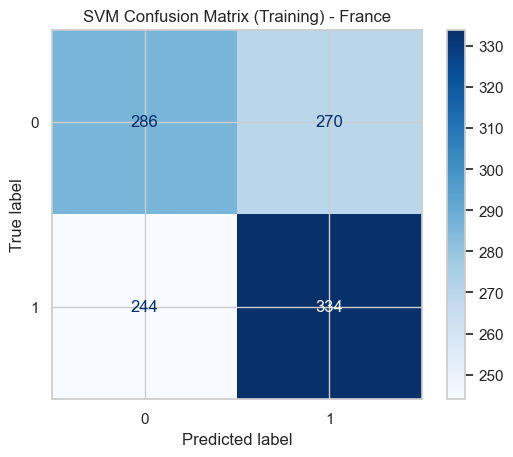

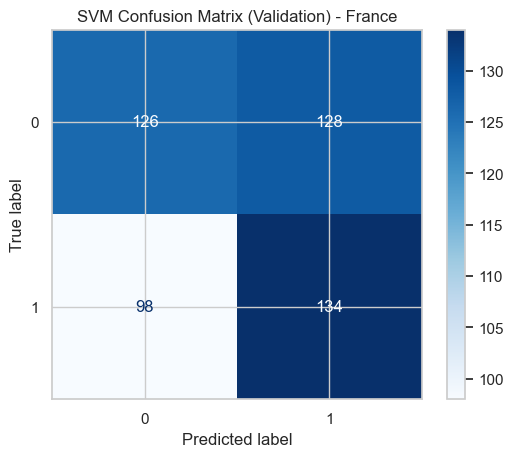

In [28]:
svm_model = SVC(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_france_resampled, y_france_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(svm_model, X_train, X_test, y_train, y_test, "SVM", "France")

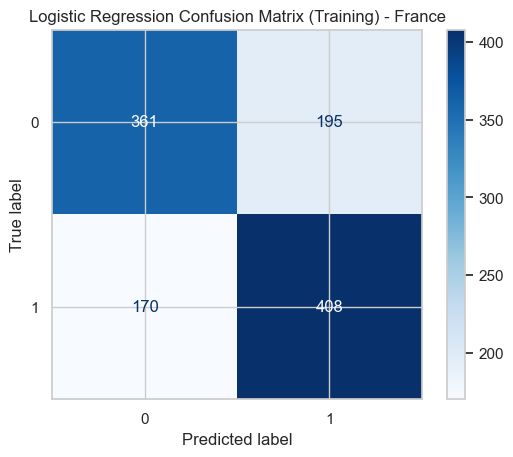

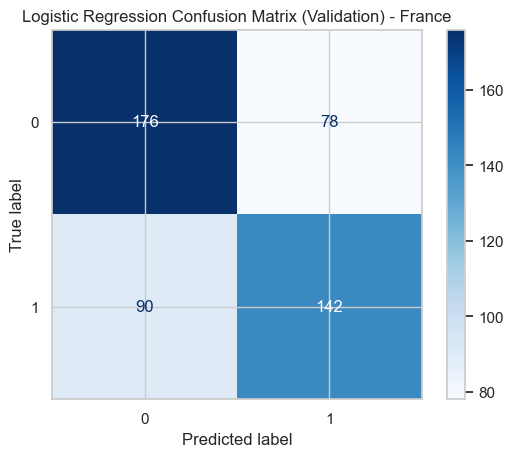

In [29]:
lr_model = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_france_resampled, y_france_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression", "France")

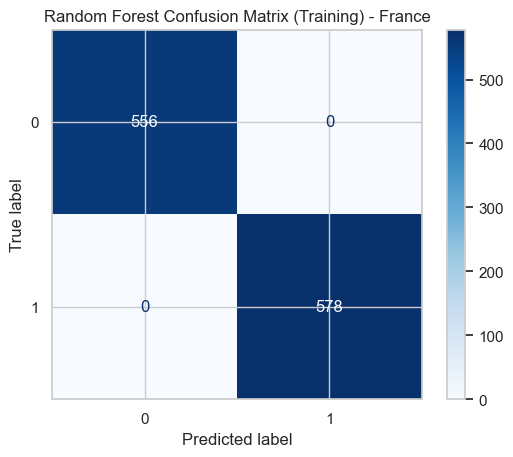

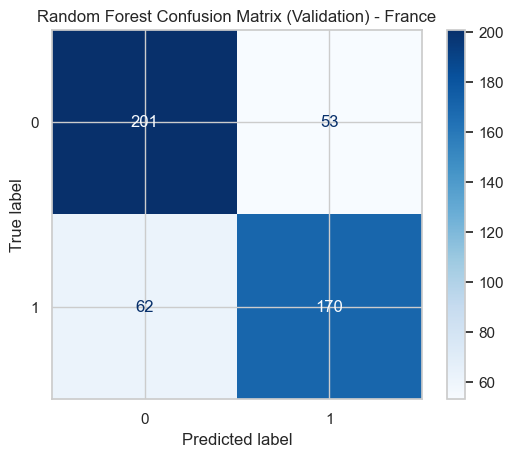

In [30]:
rf_model = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_france_resampled, y_france_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(rf_model, X_train, X_test, y_train, y_test, "Random Forest", "France")

### Spain

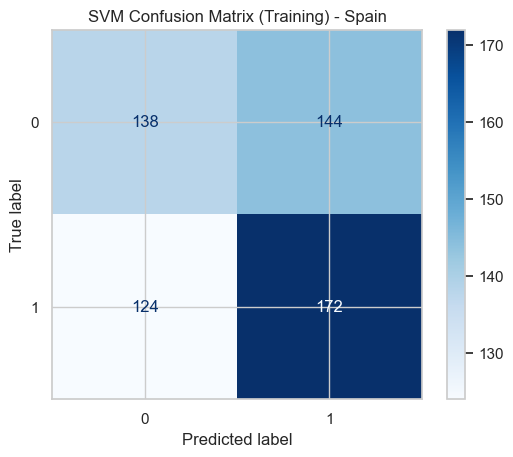

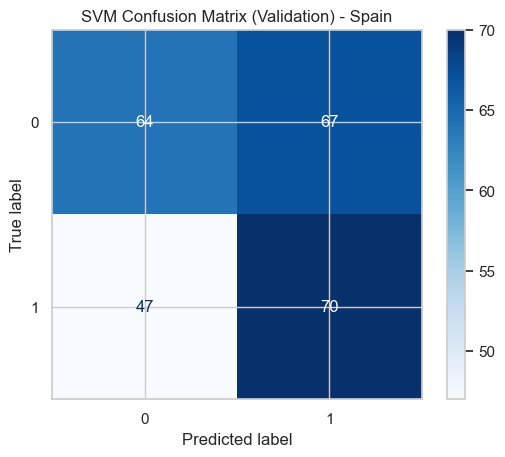

In [34]:
svm_model = SVC(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_spain_resampled, y_spain_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(svm_model, X_train, X_test, y_train, y_test, "SVM", "Spain")

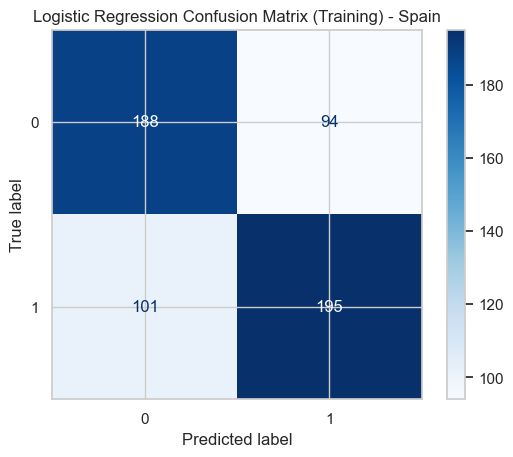

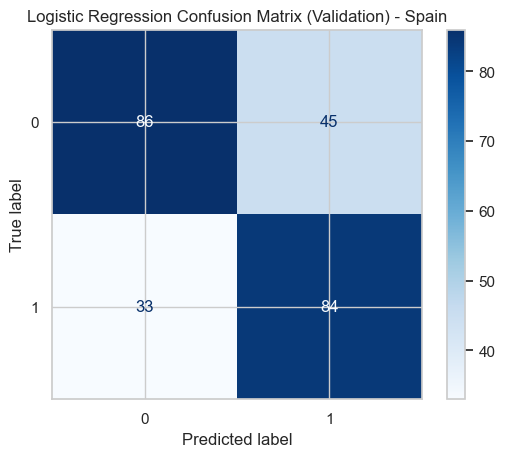

In [36]:
lr_model = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_spain_resampled, y_spain_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression", "Spain")

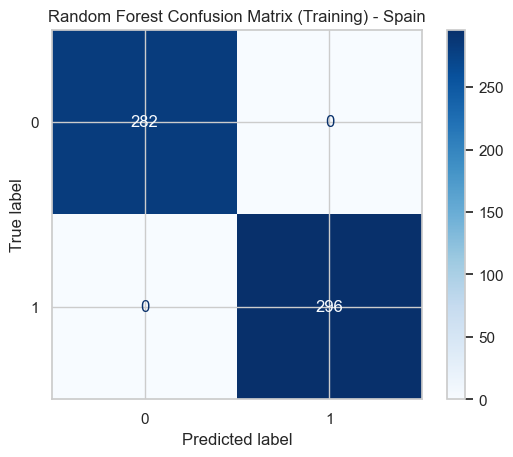

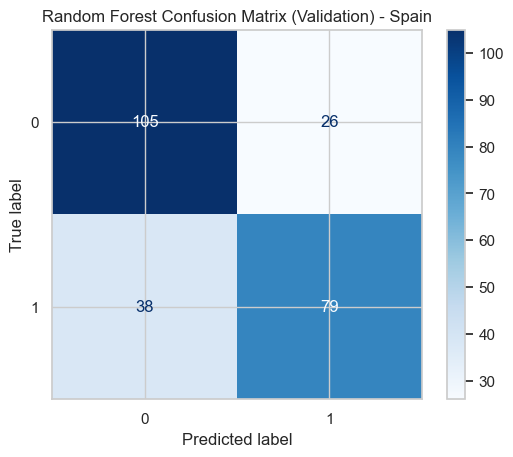

In [37]:
rf_model = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_spain_resampled, y_spain_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(rf_model, X_train, X_test, y_train, y_test, "Random Forest", "Spain")

#### Germany

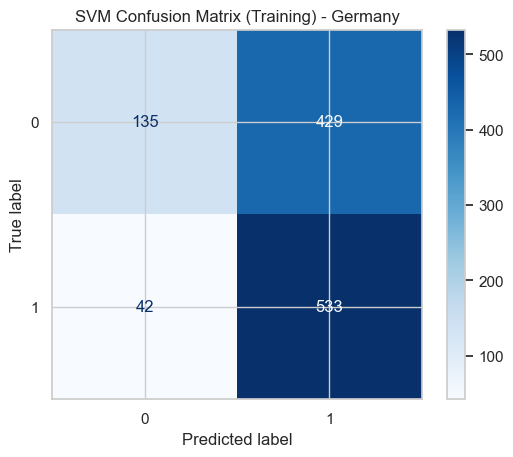

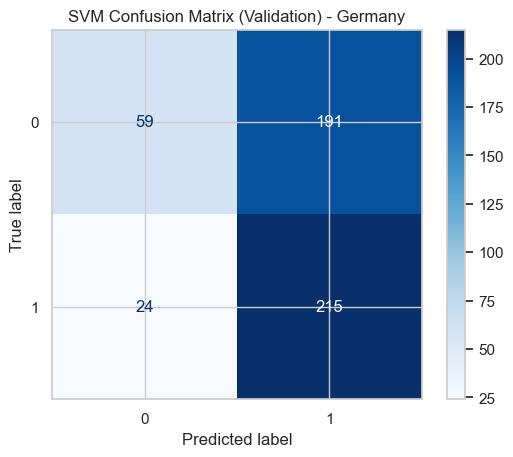

In [38]:
svm_model = SVC(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_germany_resampled, y_germany_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(svm_model, X_train, X_test, y_train, y_test, "SVM", "Germany")

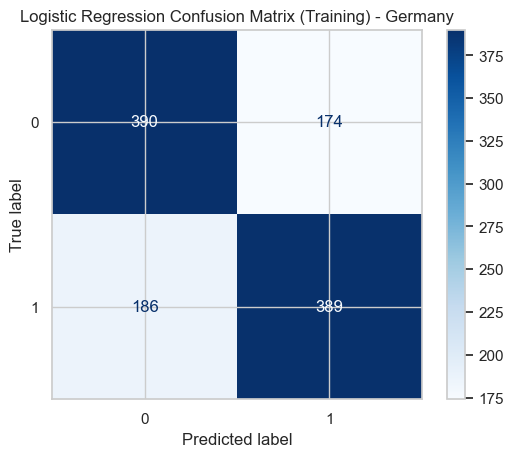

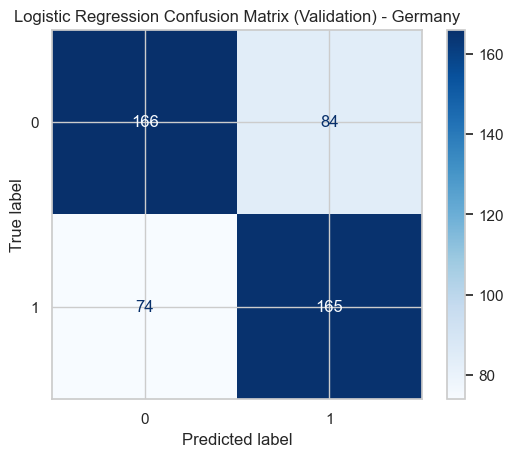

In [39]:
lr_model = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_germany_resampled, y_germany_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression", "Germany")

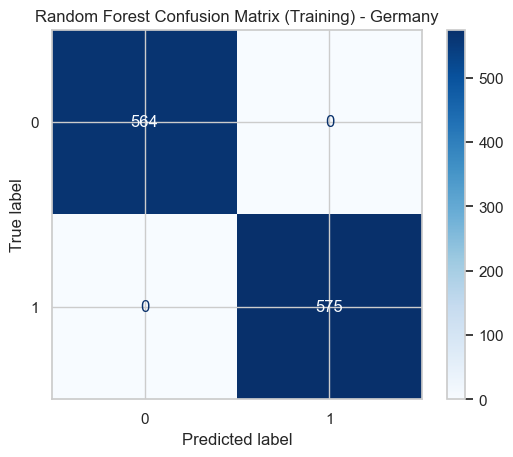

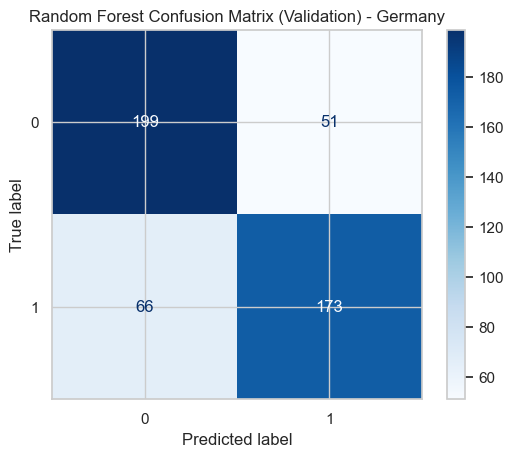

In [40]:
rf_model = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_germany_resampled, y_germany_resampled, test_size=0.3, random_state=42)
train_and_plot_confusion_matrices(rf_model, X_train, X_test, y_train, y_test, "Random Forest", "Germany")

In [41]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
import matplotlib.pyplot as plt

# Function to plot both Precision-Recall and ROC curves
def plot_evaluation_curves(model, X_train, X_test, y_train, y_test, model_name, country_name):
    # Train the model
    model.fit(X_train, y_train)

    # Plot Precision-Recall Curve
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plot_precision_recall_curve(model, X_test, y_test)
    plt.title(f"Precision-Recall Curve ({model_name} - {country_name})")

    # Plot ROC Curve
    plt.subplot(1, 2, 2)
    plot_roc_curve(model, X_test, y_test)
    plt.title(f"ROC Curve ({model_name} - {country_name})")

    plt.tight_layout()
    plt.show()

# Example for Random Forest on France dataset
rf_model = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_france_resampled, y_france_resampled, test_size=0.3, random_state=42)

# Plot both evaluation curves
plot_evaluation_curves(rf_model, X_train, X_test, y_train, y_test, "Random Forest", "France")

ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (/opt/miniconda3/envs/untitled/lib/python3.8/site-packages/sklearn/metrics/__init__.py)